In [1]:
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cmath

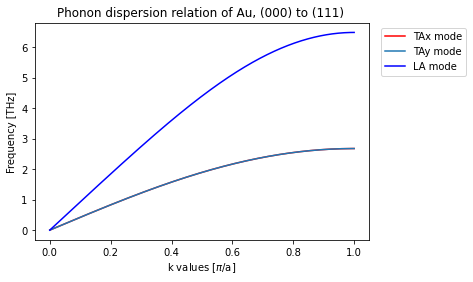

In [2]:
# Reading the phonon dispersion data:
filename = 'Au_morse_111.disp'
with open(filename, 'r') as file:
    lines = file.readlines()

data = [line.split() for line in lines if not line.startswith('#')]

data = np.array(data)
data = data.astype(np.float64)
cm_2_THz = 29979245800/1e12
TAx = data[0::3][:, 1]*cm_2_THz  # in (cm-1)
TAy = data[1::3][:, 1]*cm_2_THz  # in (cm-1)
LA = data[2::3][:, 1]*cm_2_THz   # in (cm-1)
k_val = (data[0::3][:, 0] - 1)/500

# fig = plt.figure(figsize=(12,6))
plt.plot(k_val, TAx, '-r', label='TAx mode')
plt.plot(k_val, TAy, '-', label='TAy mode')
plt.plot(k_val, LA, '-b', label='LA mode')
plt.xlabel('k values [$\pi$/a]')
plt.ylabel('Frequency [THz]')

plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Phonon dispersion relation of Au, (000) to (111) ')
plt.show()

In [28]:
# Phonon variables:
a0 = 4.079016               # lattice parameter of Au, a = 4.0782(lit), 4.07901835(calc)
A = 0.002                       # Amplitude of the wave in angstrom, 2e-3
eps_k = 1                  # e(k0) = Polarization wave vector, why 1?
val = 300                    # 1 = 1/500, 5 = 5/500 range(5, 10, 15, 25)          
a = a0/np.sqrt(3)            # Case-3
spatial_extent = 80
gamma = spatial_extent*a0    # Spatial extent
wavelength = 2*a/k_val[val]

# Phonon dispersion relation values:
# These values should be obtained from Phonon-dispersion relation of Au 

k0 = k_val[val]*np.pi/a               # wave vector, k0 = 0.9*pi/a
w_LA = 2*np.pi*LA[val]           # in Hz, LA freq corresponding to k0 = 0.9*pi/a
w_TA = 2*np.pi*TAx[val]           # in Hz, TA freq corresponding to k0 = 0.9*pi/a


print("k-value:", k_val[val], "\nLambda:", wavelength,"A", "\nLA freq:", LA[val],"THz", 
      "\nTA freq:", TAx[val], "THz");

k-value: 0.6 
Lambda: 7.85006995209597 A 
LA freq: 5.102035424373302 THz 
TA freq: 2.165911021001287 THz


In [29]:
# Computing the displacements
xn = np.linspace(22.92, 8477, 3597)                   # All positions
x0 = xn[xn.shape[0]//2-3100]            # middle of the Au layer, for 2600 A

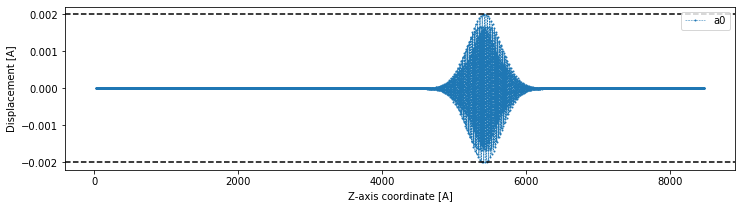

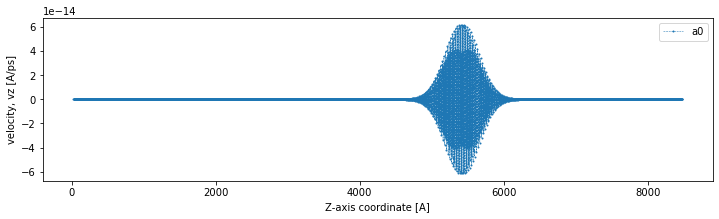

Input paramters:
k-value: 0.6
Selected frequency: 5.102035424373302 THz
Lattice parameter: 2.3550209856287907 Ang
Center of wave packet: 5418.390967741936


In [30]:
y = 0 + k0*(xn - x0)*1j
disp0 = A*eps_k*np.exp(-(xn - x0)**2/gamma**2)*np.exp(y)

fig = plt.figure(figsize=(12,3))
# Plot the position
U0 = np.real(disp0)
plt.plot(xn, U0, 'o--', markersize=1, linewidth=0.5, label='a0')
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("Displacement [A]")
plt.axhline(0.002, color='k', ls='--')
plt.axhline(-0.002, color='k', ls='--')
# plt.xlim(800, 1800)
# plt.ylim(-0.3, 0.3)
plt.legend()
plt.savefig("Displacement.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

fig = plt.figure(figsize=(12,3))
# Plot the velocity
vz0 = (w_LA*np.imag(disp0))/1e12    # A/ps
plt.plot(xn, vz0, 'o--', markersize=1, linewidth=0.5, label='a0')
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("velocity, vz [A/ps]")
# plt.xlim(800, 1800)
# plt.ylim(-0.3, 0.3)
# plt.axhline(0.045, color='k', ls='--')
# plt.axhline(-0.045, color='k', ls='--')
plt.legend()
plt.savefig("Velocity.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

print('Input paramters:')
print('k-value:', k_val[val])
print('Selected frequency:', LA[val], 'THz')
print('Lattice parameter:', a, 'Ang')
print('Center of wave packet:', x0)

# xn = np.repeat(xn, 360)
# U0 = np.repeat(U0, 360); print("Disp shape:", U0.shape)
# vz0 = np.repeat(vz0, 360); print("Vel shape:", vz0.shape)

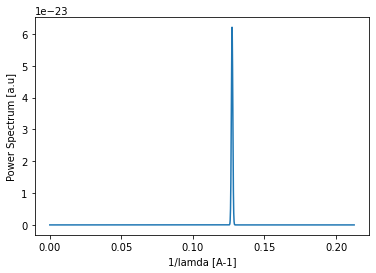

Difference in pos: 2.3509677419354844
Peak_freq: [0.12724044]
Wavelength: [7.85913659]


In [31]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# Fourier analysis:
time = xn                       # Pz
time_step = time[1] - time[0]

# Compute the FFT.
fft_result = np.fft.fft(vz0)   # vz
# fft_result = np.fft.fft(U0)   # vz

# # Compute the power spectrum.
power_spectrum = np.abs(fft_result)**2
# power_spectrum = np.abs(fft_result)

# # Compute the corresponding frequencies for each FFT bin.
frequencies = np.fft.fftfreq(len(time), time_step)

# Plot the power spectrum vs frequency.
mask = frequencies > 0  # only consider the positive frequencies

freq_new = frequencies[mask]
power_spectrum = power_spectrum[mask]
    
plt.plot(freq_new, power_spectrum)
# plt.xlim(0, 50)
# plt.ylim(0, 500000)
# plt.yscale('log')
plt.xlabel('1/lamda [A-1]')
plt.ylabel('Power Spectrum [a.u]')
plt.show()

# Peak position analysis:
# This time, set a higher threshold for peak height.
peak_threshold = np.max(power_spectrum) * 0.1  # for example, half of the maximum value
peaks, _ = find_peaks(power_spectrum, height=peak_threshold)
peak_freq = frequencies[peaks]
print("Difference in pos:", time_step)
print("Peak_freq:", peak_freq)
print("Wavelength:", 1/peak_freq)

#### Lesson learned:
- You can use both position as well as velocity data to extract wavelength information
- Average the data over given atomic plane then use it for fourier analysis
- The timestep that you define has huge consequences

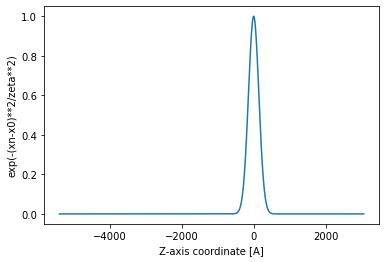

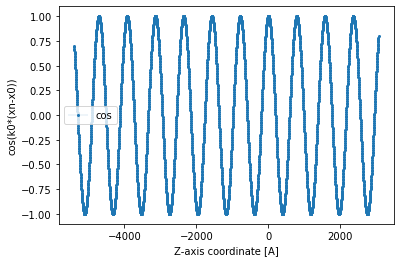

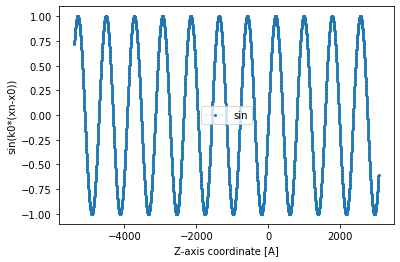

In [39]:
ex = np.exp(-(xn-x0)**2/zeta**2)

k0 = k_val[val]*np.pi/a

# plot exp part:
plt.plot(xn-x0, ex)
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("exp(-(xn-x0)**2/zeta**2)")
plt.savefig("Exponential.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

#Real part of U:
U_cos = np.cos(k0*(xn-x0))
U_real = U_cos*ex

# Imaginary part of U:
U_sin = np.sin(k0*(xn-x0))
U_img = U_sin*ex

# Plotting:
plt.plot(xn-x0, U_cos, 'o--', markersize=2, linewidth=0.2, label='cos')
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("cos(k0*(xn-x0))")
plt.legend()
plt.savefig("cos.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

xnew = np.linspace(-2.60074, 2340.65, 2000)
x0new = xnew[xnew.shape[0]//2]
U_sinnew = np.sin(k0*(xnew-x0new))

# Plotting:
# plt.plot(xnew-x0new, U_sinnew, '*',label='sin_3000 planes')
plt.plot(xn-x0, U_sin, 'o--', markersize=2, linewidth=0.2, label='sin')
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("sin(k0*(xn-x0))")
# plt.xlim(1000, 1400)
plt.legend()
plt.savefig("sin.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()


In [4]:
# xn = np.linspace(-2.6, 10, 100)        # Total distance in A
# plt.plot(xn, np.sin(xn), label='100 planes')
# xn0 = np.linspace(-2.6, 10, 5)        # Total distance in A
# plt.plot(xn0, np.sin(xn0), label='5 planes')
# plt.legend()
# plt.savefig("few_planes_problem.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
# plt.show()